In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import acquire
import prepare

In [2]:
df = acquire.get_data()

In [3]:
df = prepare.prep_data(df)

In [4]:
df.shape

(847329, 12)

In [5]:
df.head()

,date,time,ip,path,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program
date,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,97.105.19.61,/,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:02,97.105.19.61,java-ii,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:05,97.105.19.61,java-ii/object-oriented-programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:06,97.105.19.61,slides/object_oriented_programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:24,97.105.19.61,javascript-i/conditionals,2,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2,Full Stack Java


In [6]:
df.dtypes

date           datetime64[ns]
time                   object
ip                     object
path                   object
user_id                 int64
cohort_id             float64
cohort_name            object
slack                  object
start_date             object
end_date               object
program_id              int64
program                object
dtype: object

In [7]:
# Create new array called pages, that represents that number of page use on each day
pages = df['path'].resample('d').count()
pages.head()

date
2018-01-26    533
2018-01-27    230
2018-01-28    168
2018-01-29    783
2018-01-30    614
Freq: D, Name: path, dtype: int64

<AxesSubplot:xlabel='date'>

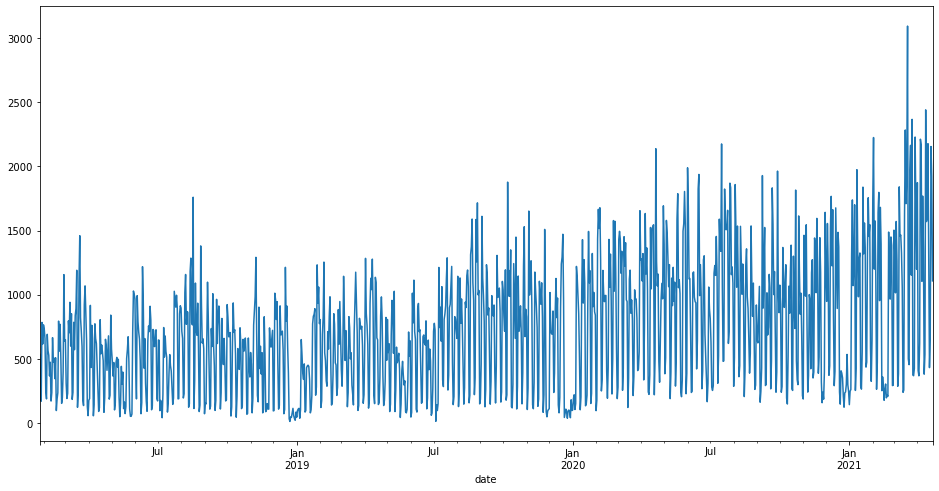

In [8]:
plt.figure(figsize = (16,8))
pages.plot()

## Question 4: Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

### User and their IP addresses

#### Does any user have multiple ip address?

In [78]:
ip = pd.DataFrame(df.groupby('user_id').ip.nunique(), columns = ['ip'])

In [87]:
q1 = ip['ip'].quantile(0.25)
q3 = ip['ip'].quantile(0.75)
iqr = q3-q1

In [159]:
upper_bound = q3 + 3*iqr
lower_bound = q1
upper_bound, lower_bound

(30.0, 2.0)

**NOTE: lower bound is not necessary**

<AxesSubplot:title={'center':'ip Address Number Distribution'}, ylabel='Density'>

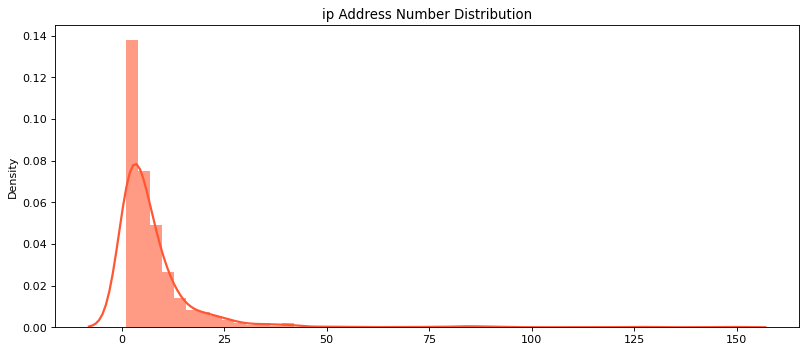

In [103]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(12,5), dpi= 80)
plt.title('ip Address Number Distribution')
sns.distplot(x=ip['ip'], **kwargs, color = '#FF5733')

#### Deciding on the cutoff...
- 20 -> k = 1.5 75 users
- 23 -> k = 2 55 users
- **30 -> k = 3 29 users**

In [157]:
ip[ip['ip']>=30].size

29

In [213]:
ip.sort_values(by = 'ip', ascending=False).head(15)

,ip
user_id,
228,148
843,126
533,92
690,88
530,86
226,83
460,82
590,75
127,67


In [161]:
df[df.user_id ==843].ip.value_counts().head(10)

172.58.99.111     49
172.58.102.244    46
172.58.108.134    37
172.58.108.72     22
172.58.107.232    22
172.58.102.149    20
172.58.99.197     19
172.58.102.212    16
172.58.110.191    15
172.58.107.226    11
Name: ip, dtype: int64

<AxesSubplot:xlabel='date'>

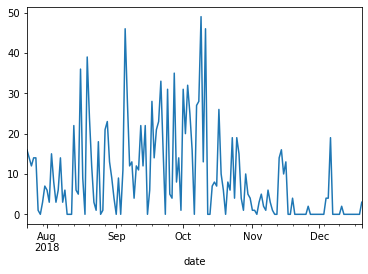

In [163]:
pages_228 = df[df.user_id == 228]['path'].resample('d').count()
pages_228.plot()

**User 228 highly suspicious**

<AxesSubplot:xlabel='date'>

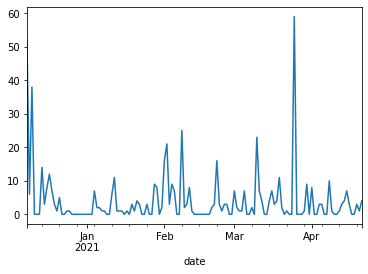

In [162]:
pages_843 = df[df.user_id == 843]['path'].resample('d').count()
pages_843.plot()

**User 843 suspicious**

<AxesSubplot:xlabel='date'>

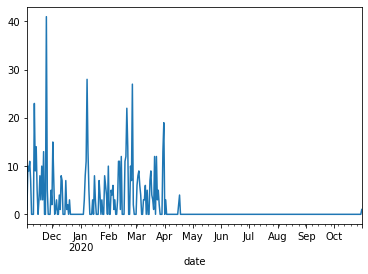

In [164]:
pages_533 = df[df.user_id ==  533]['path'].resample('d').count()
pages_533.plot()

**User 533 suspicious**

<AxesSubplot:xlabel='date'>

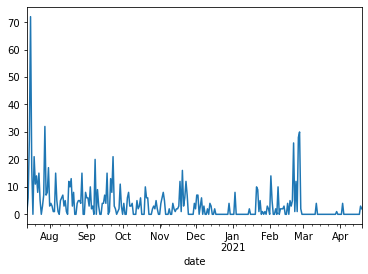

In [168]:
pages_690 = df[df.user_id == 690]['path'].resample('d').count()
pages_690.plot()

**User 690 suspicious**

<AxesSubplot:xlabel='date'>

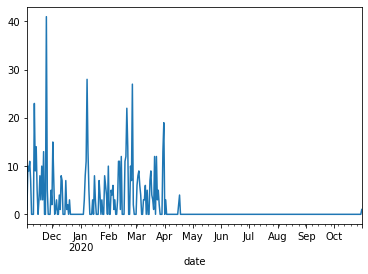

In [170]:
pages_533 = df[df.user_id == 533]['path'].resample('d').count()
pages_533.plot()

**User 533 suspicious**

<AxesSubplot:xlabel='date'>

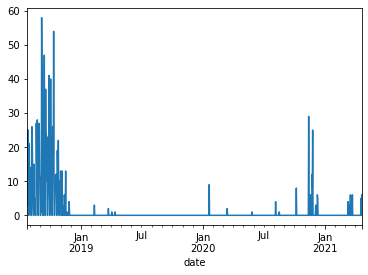

In [171]:
pages_226 = df[df.user_id == 226]['path'].resample('d').count()
pages_226.plot()

**User 226 HIGHTLY suspicious**

<AxesSubplot:xlabel='date'>

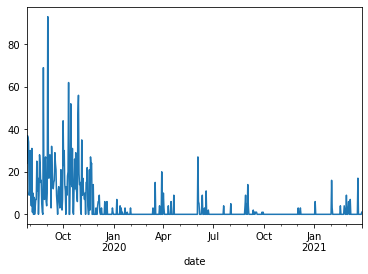

In [141]:
pages_460 = df[df.user_id == 460]['path'].resample('d').count()
pages_460.plot()

**User 460 suspicious**

<AxesSubplot:xlabel='date'>

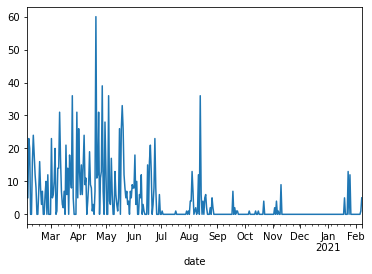

In [169]:
pages_590 = df[df.user_id == 590]['path'].resample('d').count()
pages_590.plot()

**User 590 suspicious**

<AxesSubplot:xlabel='date'>

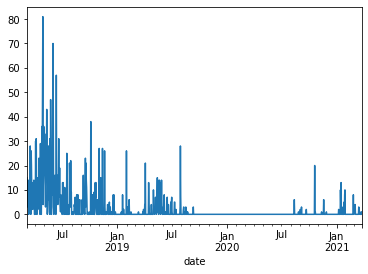

In [172]:
pages_127 = df[df.user_id == 127]['path'].resample('d').count()
pages_127.plot()

**User 127 is suspicious**

<AxesSubplot:xlabel='date'>

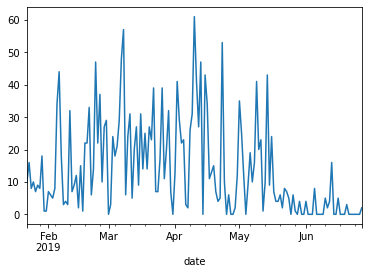

In [173]:
pages_337 = df[df.user_id == 337]['path'].resample('d').count()
pages_337.plot()

**User 337 is suspicious**

<AxesSubplot:xlabel='date'>

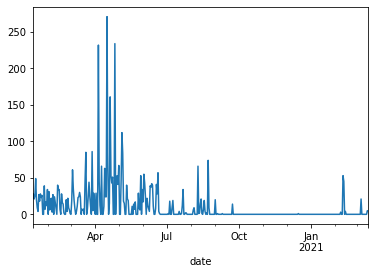

In [214]:
pages_570 = df[df.user_id == 570]['path'].resample('d').count()
pages_570.plot()

### Looking into IP address
### User 1
136.50.61.52          San Antonio, Texas
99.203.154.95         Kingsville, Texas
64.9.239.9            Montain View, California
172.56.15.46          Houston, Texas
70.120.15.165         San Antonio, Texas
172.58.102.205        Houston, Texas
99.203.155.145        San Antonio, Texas
173.123.204.117       Houston
99.203.27.106         Corpus
97.98.16.4            Corpus
172.56.15.50          Houston
99.203.155.126        San Antonio
99.203.26.250         Louisiana

**User 1 ip address mostly in Texas, and none of them are from foreign country.**

### User 228
**User 228 ip address all over the United States, none from foreign country.**

### User 843
**User 843 ip address mostly in Texas, none from foreign country.**

### User 533
**User 843 ip address mostly in Texas, some from Connecticut, District of Columbia, none from foreign country.**

### User 690
**Mostly Texas**

### User 530
**Mostly Texas, Louisiana, Wisconsin**

### User 226
**Texas, New Jersey, New York, California, Non-Detectable, SUS**

***

### Looking at user's activity over time

In [21]:
def one_user_df_prep(df, user):
    '''
    This function returns a dataframe consisting of data for only a single defined user
    '''
    df = df[df.user_id == user]
    pages_per_user = df['path'].resample('d').count()
    return pages_per_user

In [26]:
def compute_pct_b(pages_per_user, span, weight, user):
    '''
    This function adds the %b of a bollinger band range for the page views of a single user's log activity
    '''
    # Calculate upper and lower bollinger band
    midband = pages_per_user.ewm(span=span).mean()
    stdev = pages_per_user.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    
    # Add upper and lower band values to dataframe
    bb = pd.concat([ub, lb], axis=1)
    
    # Combine all data into a single dataframe
    my_df = pd.concat([pages_per_user, midband, bb], axis=1)
    my_df.columns = ['pages_per_user', 'midband', 'ub', 'lb']
    
    # Calculate percent b and relevant user id to dataframe
    my_df['pct_b'] = (my_df['pages_per_user'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

In [27]:
def plot_bands(my_df, user):
    '''
    This function plots the bolliger bands of the page views for a single user
    '''
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages_per_user, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

In [28]:
def find_anomalies(df, user, span, weight, plot=False):
    '''
    This function returns the records where a user's daily activity exceeded the upper limit of a bollinger band range
    '''
    
    # Reduce dataframe to represent a single user
    pages_per_user = one_user_df_prep(df, user)
    
    # Add bollinger band data to dataframe
    my_df = compute_pct_b(pages_per_user, span, weight, user)
    
    # Plot data if requested (plot=True)
    if plot:
        plot_bands(my_df, user)
    
    # Return only records that sit outside of bollinger band upper limit
    return my_df[my_df.pct_b>1]

#### Use function on all users

In [31]:
# Adjusting weight
span = 30
weight = 3.5

anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [32]:
anomalies

,pages_per_user,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-01-29,44,3.623334,42.081344,-34.834677,1.024945,1
2019-07-08,101,8.248768,96.507472,-80.009936,1.025451,1
2018-10-15,9,0.581421,8.457414,-7.294571,1.034446,3
2019-01-09,4,0.262470,3.802115,-3.277175,1.027953,3
2019-04-06,2,0.129825,1.889712,-1.630061,1.031334,3
...,...,...,...,...,...,...
2021-01-24,7,0.574393,6.857226,-5.708440,1.011362,817
2021-03-25,59,6.824556,58.415342,-44.766230,1.005666,843
2021-02-23,67,8.229409,66.322904,-49.864086,1.005828,851


#### Sort by pages

In [37]:
anomalies.sort_values(by='pages_per_user', ascending=False).head(20)

,pages_per_user,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-03-03,272,24.721632,266.780128,-217.336864,1.010782,341
2018-06-02,198,16.484863,188.766965,-155.797239,1.026796,138
2019-12-19,192,19.601776,187.231096,-148.027544,1.014225,526
2020-10-16,179,20.158062,173.720239,-133.404115,1.017191,658
2020-06-05,165,20.035882,163.037501,-122.965736,1.006862,521
2019-02-14,153,10.082685,143.744930,-123.579560,1.034621,223
2021-03-23,146,26.440411,145.913292,-93.032470,1.000363,581
2019-07-12,129,8.497956,121.171127,-104.175214,1.034742,309
2020-12-07,128,11.280035,121.238945,-98.678875,1.030744,480


In [41]:
df_341 = one_user_df_prep(df, 341)

<AxesSubplot:xlabel='date'>

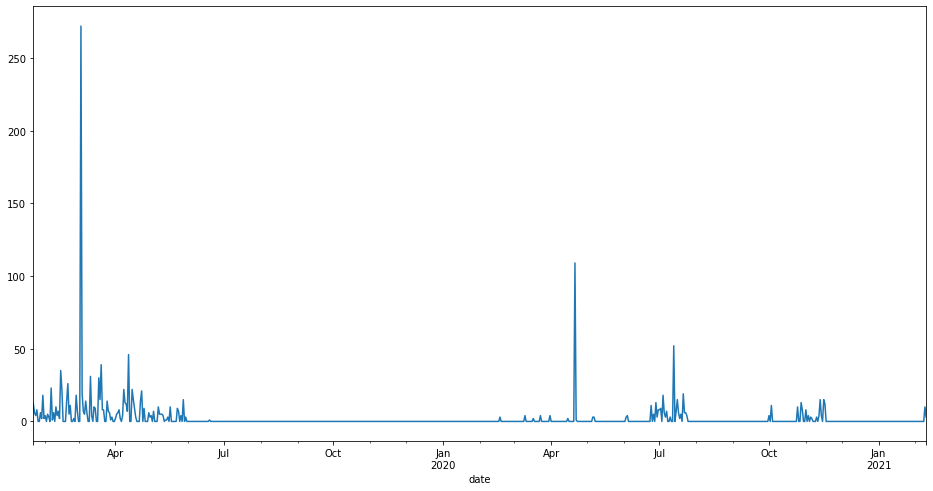

In [42]:
df_341.plot(figsize=(16,8))

**User 341 suspicious**

<AxesSubplot:xlabel='date'>

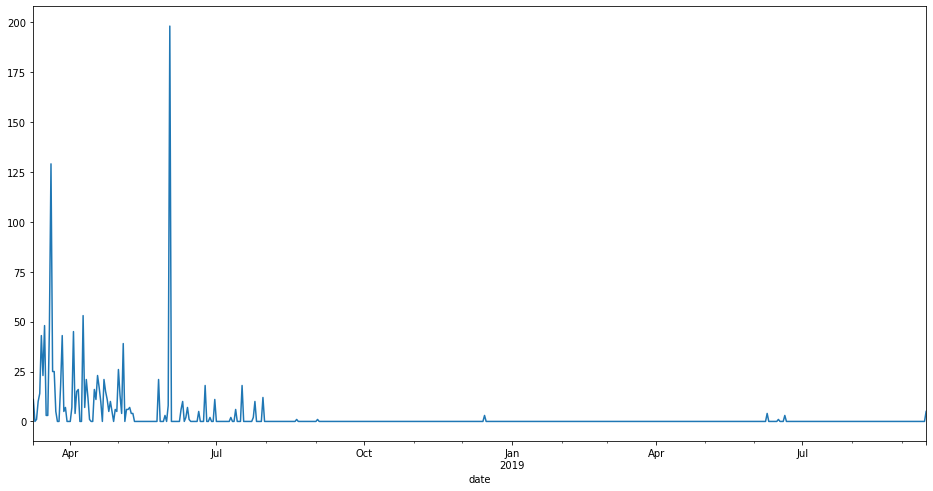

In [177]:
df_138 = one_user_df_prep(df,138)
df_138.plot(figsize=(16,8))

In [178]:
df[df.user_id==138].path

date
2018-03-09                          slides/annotations
2018-03-09                         java-ii/annotations
2018-03-09                    mkdocs/search_index.json
2018-03-09                                    appendix
2018-03-09                       appendix/git/intellij
                                ...                   
2019-09-16                                           /
2019-09-16                                           /
2019-09-16    1-fundamentals/1.1-intro-to-data-science
2019-09-16        1-fundamentals/AI-ML-DL-timeline.jpg
2019-09-16    1-fundamentals/modern-data-scientist.jpg
Name: path, Length: 1264, dtype: object

**User 138 is a Full Stack Java student but is accessing data science content.**

<AxesSubplot:xlabel='date'>

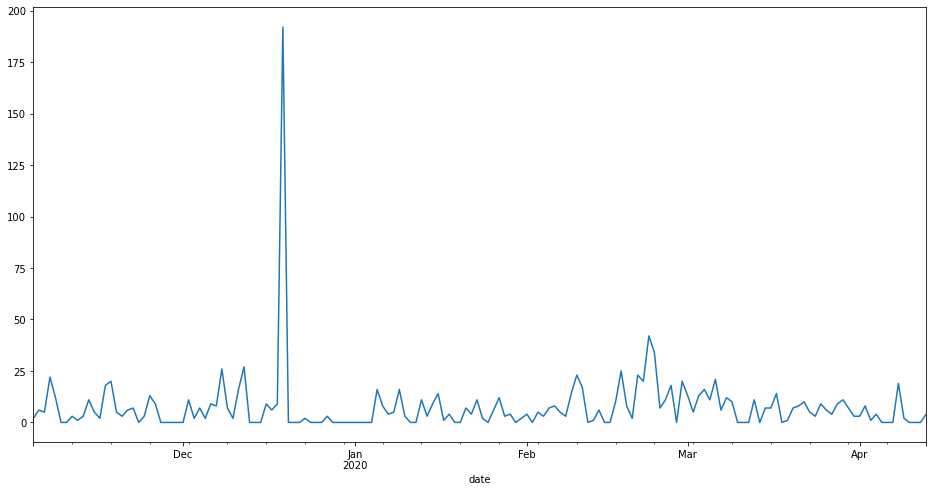

In [202]:
df_526 = one_user_df_prep(df,526)
df_526.plot(figsize=(16,8))

**User 526 seems normal**

<AxesSubplot:xlabel='date'>

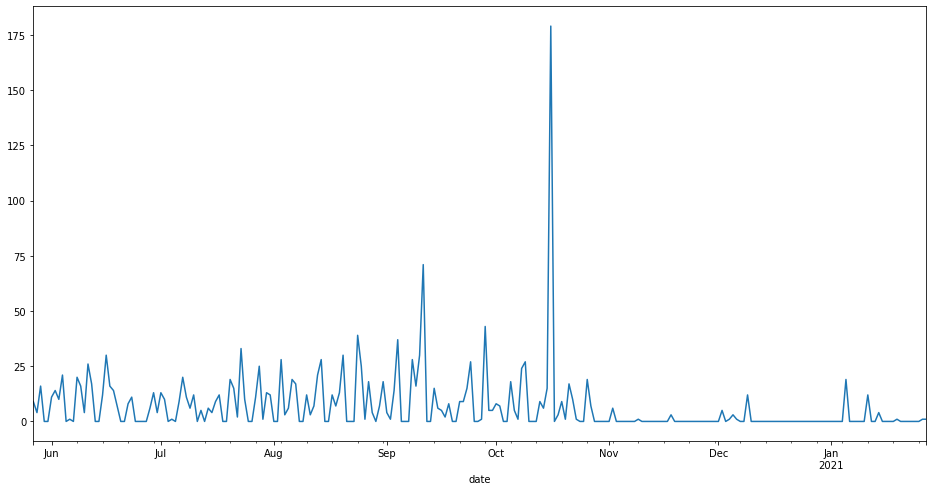

In [206]:
df_658 = one_user_df_prep(df,658)
df_658.plot(figsize=(16,8))

**User 658 seems normal**

<AxesSubplot:xlabel='date'>

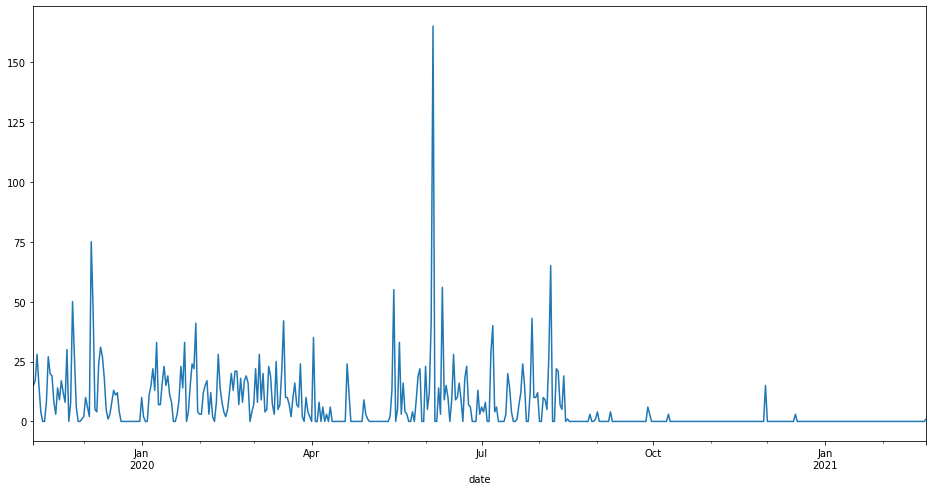

In [211]:
df_521 = one_user_df_prep(df,521)
df_521.plot(figsize=(16,8))

In [212]:
df[df.user_id==621].program

date
2020-03-23    Full Stack Java
2020-03-24    Full Stack Java
2020-03-24    Full Stack Java
2020-03-24    Full Stack Java
2020-03-24    Full Stack Java
                   ...       
2021-03-02    Full Stack Java
2021-03-02    Full Stack Java
2021-03-02    Full Stack Java
2021-03-02    Full Stack Java
2021-03-02    Full Stack Java
Name: program, Length: 1624, dtype: object

In [210]:
df[(df.user_id == 526)& (df.path.str.contains('data'))].path

date
2019-11-25    javascript-i/introduction/working-with-data-ty...
2019-11-25    javascript-i/introduction/working-with-data-ty...
2019-11-25    javascript-i/introduction/working-with-data-ty...
2019-11-25    javascript-i/introduction/working-with-data-ty...
2019-12-02    javascript-i/introduction/working-with-data-ty...
2019-12-08    javascript-i/introduction/working-with-data-ty...
2019-12-19    javascript-i/introduction/working-with-data-ty...
2019-12-19                                      mysql/databases
2019-12-19                                mysql/sample-database
2019-12-19                                mysql/database-design
2020-02-18                                      mysql/databases
2020-02-18                                mysql/database-design
2020-02-18                                      mysql/databases
2020-02-19                                mysql/sample-database
2020-02-19                                mysql/sample-database
2020-02-21                         

## Question 6: What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [215]:
df.head()

,date,time,ip,path,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program
date,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,97.105.19.61,/,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:02,97.105.19.61,java-ii,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:05,97.105.19.61,java-ii/object-oriented-programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:06,97.105.19.61,slides/object_oriented_programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:24,97.105.19.61,javascript-i/conditionals,2,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2,Full Stack Java


In [217]:
df.end_date = pd.to_datetime(df.end_date)

In [218]:
df[df.date>df.end_date].groupby('u')

,date,time,ip,path,user_id,cohort_id,cohort_name,slack,start_date,end_date,program_id,program
date,,,,,,,,,,,,
2018-01-26,2018-01-26,09:55:03,97.105.19.61,/,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:02,97.105.19.61,java-ii,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:05,97.105.19.61,java-ii/object-oriented-programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,09:56:06,97.105.19.61,slides/object_oriented_programming,1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,1,Full Stack PHP
2018-01-26,2018-01-26,10:14:47,97.105.19.61,/,11,1.0,Arches,#arches,2014-02-04,2014-04-22,1,Full Stack PHP
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21,2021-04-21,16:41:51,71.150.217.33,jquery/personal-site,64,28.0,Staff,#,2014-02-04,2014-02-04,2,Full Stack Java
2021-04-21,2021-04-21,16:42:02,71.150.217.33,jquery/mapbox-api,64,28.0,Staff,#,2014-02-04,2014-02-04,2,Full Stack Java
2021-04-21,2021-04-21,16:42:09,71.150.217.33,jquery/ajax/weather-map,64,28.0,Staff,#,2014-02-04,2014-02-04,2,Full Stack Java
